# CM3720 - Machine Learning Assignment
### 225544G - Subramaniam A

## Problem Statement

Accurately predicting rental prices is a critical task for property owners, real estate agents, and tenants in making informed financial decisions. Rental prices are influenced by multiple factors such as property size, number of bedrooms and bathrooms, neighborhood, proximity to the city center, furnishing status, building type, and property age. 

The challenge is to develop a predictive model that can estimate the rental price of a property based on these features, while capturing potential non-linear relationships and interactions between variables. 

This project explores unconventional and experimental modeling approaches beyond traditional regression and ensemble methods to achieve robust and accurate rental price predictions in a real-world Sri Lankan context.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the Dataset

In [9]:
df = pd.read_csv("./colombo_rental_dataset_v1.csv")
df.head()

,Property_ID,Size_in_Sqft,Bedrooms,Bathrooms,Neighborhood,Furnished,Building_Type,Rental_Price,Property_Age,Distance_to_City_Center
0,1,692,1.0,2,Uptown,Furnished,Apartment,3035.497680,19,2.07
1,2,622,3.0,1,Suburbs,Unfurnished,Condo,4316.686202,6,10.85
2,3,559,1.0,1,Downtown,Furnished,Studio,2211.047997,5,10.55
3,4,307,1.0,1,Uptown,Furnished,Studio,2330.542651,2,7.37
4,5,1097,3.0,2,uptown,Unfurnished,Apartment,5272.940908,16,7.41


## Data Dictionary

| Column Name               | Data Type | Description                                                                                  |
|---------------------------|-----------|----------------------------------------------------------------------------------------------|
| Property_ID               | int64     | Unique identifier for each property                                                          |
| Size_in_Sqft              | int64     | Total area of the property in square feet                                                    |
| Bedrooms                  | float64   | Number of bedrooms in the property                                                           |
| Bathrooms                 | int64     | Number of bathrooms in the property                                                         |
| Neighborhood              | object    | The area or locality where the property is located                                           |
| Furnished                 | object    | Indicates if the property is furnished or not                                       |
| Building_Type             | object    | Type of the building (e.g., Apartment, House, Condo)               |
| Rental_Price              | float64   | Monthly rental price of the property (target variable)                                       |
| Property_Age              | int64     | Age of the property in years                                                                 |
| Distance_to_City_Center   | float64   | Distance of the property from the city center in kilometers                                  |


## Initial Exploration

In [12]:
len(df)

445

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Property_ID              445 non-null    int64  
 1   Size_in_Sqft             445 non-null    int64  
 2   Bedrooms                 434 non-null    float64
 3   Bathrooms                445 non-null    int64  
 4   Neighborhood             445 non-null    object 
 5   Furnished                445 non-null    object 
 6   Building_Type            440 non-null    object 
 7   Rental_Price             445 non-null    float64
 8   Property_Age             445 non-null    int64  
 9   Distance_to_City_Center  445 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 34.9+ KB


In [14]:
df.describe()

,Property_ID,Size_in_Sqft,Bedrooms,Bathrooms,Rental_Price,Property_Age,Distance_to_City_Center
count,445.000000,445.000000,434.000000,445.000000,445.000000,445.000000,445.000000
mean,224.734831,794.869663,2.006912,1.244944,3864.158134,12.080899,6.732921
std,130.070275,304.786044,9.558979,0.430538,1997.709703,6.347144,3.614542
min,1.000000,301.000000,1.000000,1.000000,804.814268,1.000000,0.170000
25%,113.000000,557.000000,1.000000,1.000000,2330.542651,7.000000,3.490000
50%,224.000000,785.000000,1.000000,1.000000,3595.205296,11.000000,6.910000
75%,337.000000,1012.000000,2.000000,1.000000,4923.971991,17.000000,9.660000
max,452.000000,1497.000000,200.000000,2.000000,13179.276580,30.000000,14.930000


In [15]:
df.isna().sum()

Property_ID                 0
Size_in_Sqft                0
Bedrooms                   11
Bathrooms                   0
Neighborhood                0
Furnished                   0
Building_Type               5
Rental_Price                0
Property_Age                0
Distance_to_City_Center     0
dtype: int64

#### Note: 
We have missing values in Bedrooms and Building_Type 

In [17]:
df.duplicated().sum()

0

In [19]:
df.dtypes

Property_ID                  int64
Size_in_Sqft                 int64
Bedrooms                   float64
Bathrooms                    int64
Neighborhood                object
Furnished                   object
Building_Type               object
Rental_Price               float64
Property_Age                 int64
Distance_to_City_Center    float64
dtype: object

#### Note:

Since Property_ID is just a unique identifier, it doesn’t help with prediction, so we can safely drop it.

In [27]:
df = df.drop(columns=['Property_ID'])

In [29]:
df.head()

,Size_in_Sqft,Bedrooms,Bathrooms,Neighborhood,Furnished,Building_Type,Rental_Price,Property_Age,Distance_to_City_Center
0,692,1.0,2,Uptown,Furnished,Apartment,3035.497680,19,2.07
1,622,3.0,1,Suburbs,Unfurnished,Condo,4316.686202,6,10.85
2,559,1.0,1,Downtown,Furnished,Studio,2211.047997,5,10.55
3,307,1.0,1,Uptown,Furnished,Studio,2330.542651,2,7.37
4,1097,3.0,2,uptown,Unfurnished,Apartment,5272.940908,16,7.41


In [32]:
df["Neighborhood"].value_counts()

Neighborhood
Midtown     122
Uptown      117
Suburbs     100
Downtown     94
uptown        7
suburbs       5
Name: count, dtype: int64

#### Note:

Neighborhood column has inconsistent capitalization: "Uptown" vs "uptown", "Suburbs" vs "suburbs". This causes the same category to appear multiple times.

In [35]:
df['Neighborhood'] = df['Neighborhood'].str.strip().str.title()

print(df['Neighborhood'].value_counts())

Neighborhood
Uptown      124
Midtown     122
Suburbs     105
Downtown     94
Name: count, dtype: int64


In [37]:
df["Building_Type"].value_counts()

Building_Type
Condo        148
Apartment    142
Studio       142
condo          5
apartment      3
Name: count, dtype: int64

In [39]:
df['Building_Type'] = df['Building_Type'].str.strip().str.title()

print(df['Building_Type'].value_counts())

Building_Type
Condo        153
Apartment    145
Studio       142
Name: count, dtype: int64


In [41]:
df['Furnished'].value_counts()

Furnished
Furnished      296
Unfurnished    138
unfurnished     10
furnished        1
Name: count, dtype: int64

In [43]:
df['Furnished'] = df['Furnished'].str.strip().str.title()

print(df['Furnished'].value_counts())

Furnished
Furnished      297
Unfurnished    148
Name: count, dtype: int64


### Handling Missing Values

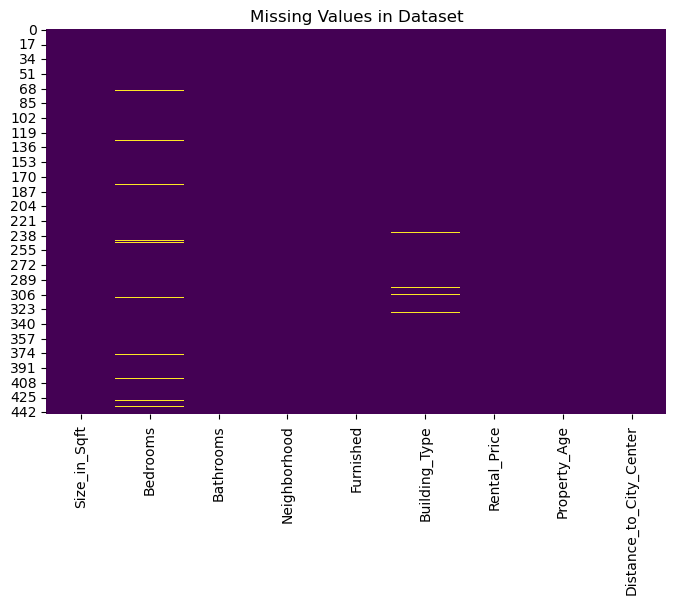

In [46]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()


In [47]:
from scipy.stats import ttest_ind

missing = df[df['Bedrooms'].isnull()]['Rental_Price']
observed = df[df['Bedrooms'].notnull()]['Rental_Price']

t_stat, p_val = ttest_ind(missing, observed, nan_policy='omit')
print(f"P-value: {p_val}")


P-value: 0.8735087840911885


In [48]:
from scipy.stats import chi2_contingency

missing_bt = df['Building_Type'].isnull().astype(int)
ct = pd.crosstab(missing_bt, df['Neighborhood'])
chi2, p, dof, ex = chi2_contingency(ct)
print(f"P-value: {p}")


P-value: 0.36665769874986764


#### Note:

Both the missing values are Missing Completely at Random. Therefore filling Bedrooms with Median and Building Type with Mode.

In [53]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
df['Bedrooms'] = num_imputer.fit_transform(df[['Bedrooms']]).astype('int64')

cat_imputer = SimpleImputer(strategy='most_frequent')
df['Building_Type'] = cat_imputer.fit_transform(df[['Building_Type']]).ravel() 

print(df.isnull().sum())


Size_in_Sqft               0
Bedrooms                   0
Bathrooms                  0
Neighborhood               0
Furnished                  0
Building_Type              0
Rental_Price               0
Property_Age               0
Distance_to_City_Center    0
dtype: int64


In [55]:
print(df.dtypes)

Size_in_Sqft                 int64
Bedrooms                     int64
Bathrooms                    int64
Neighborhood                object
Furnished                   object
Building_Type               object
Rental_Price               float64
Property_Age                 int64
Distance_to_City_Center    float64
dtype: object


## Univariate Analysis

### Univariate Analysis - Numeric Columns

       Size_in_Sqft    Bedrooms   Bathrooms  Property_Age  \
count    445.000000  445.000000  445.000000    445.000000   
mean     794.869663    1.982022    1.244944     12.080899   
std      304.786044    9.441123    0.430538      6.347144   
min      301.000000    1.000000    1.000000      1.000000   
25%      557.000000    1.000000    1.000000      7.000000   
50%      785.000000    1.000000    1.000000     11.000000   
75%     1012.000000    2.000000    1.000000     17.000000   
max     1497.000000  200.000000    2.000000     30.000000   

       Distance_to_City_Center  
count               445.000000  
mean                  6.732921  
std                   3.614542  
min                   0.170000  
25%                   3.490000  
50%                   6.910000  
75%                   9.660000  
max                  14.930000  


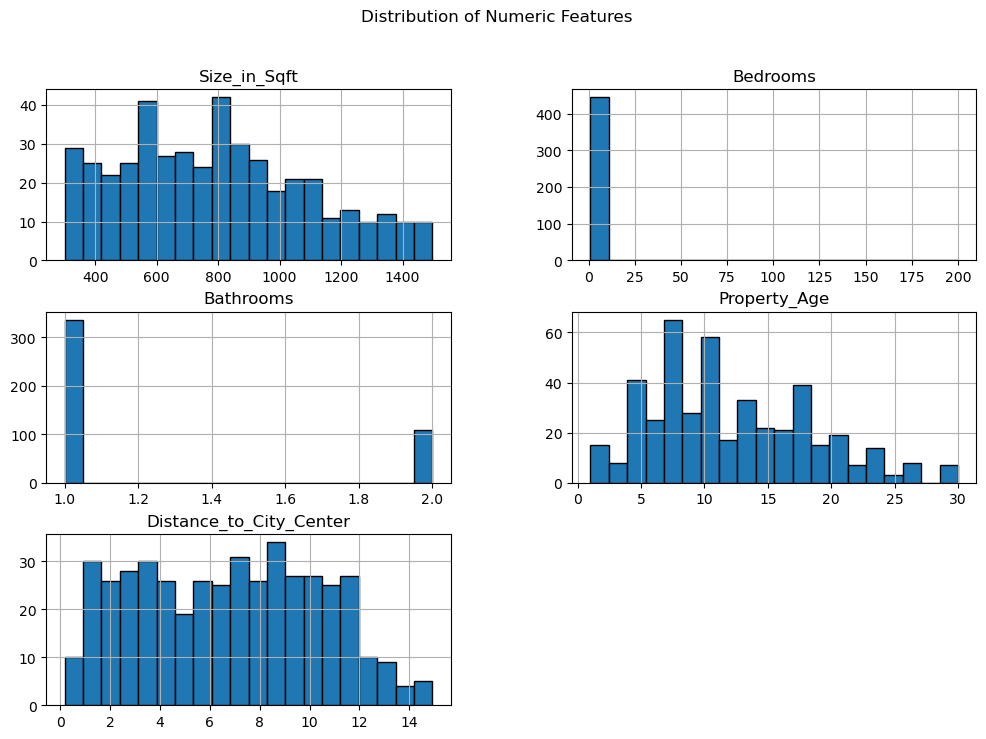

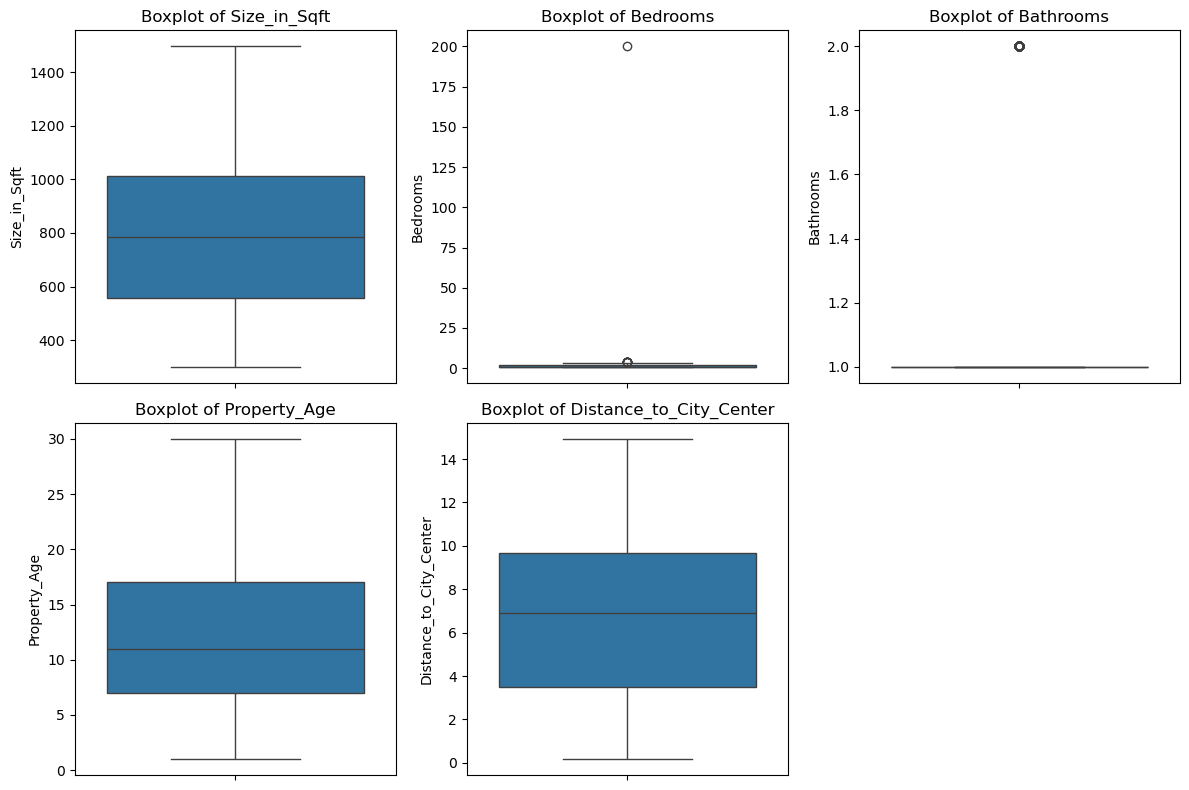

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Size_in_Sqft', 'Bedrooms', 'Bathrooms', 'Property_Age', 'Distance_to_City_Center']

print(df[num_cols].describe())

df[num_cols].hist(figsize=(12,8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numeric Features")
plt.show()

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### Note

The above visualization suggests there could be a potential outlier in the features Bedrooms and Bathrooms

### Outlier Handling

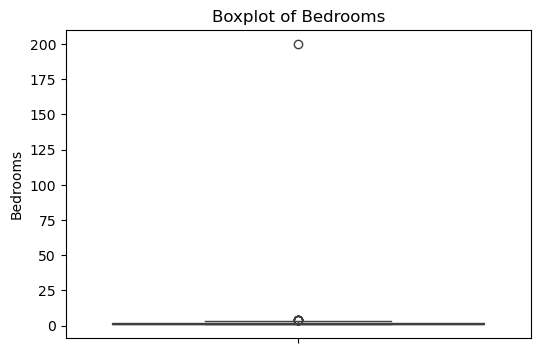

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Bedrooms'])
plt.title("Boxplot of Bedrooms")
plt.show()

In [63]:
max(df["Bedrooms"])

200

### Note

The value 200 for Bedrooms is definitely should be a data entry error. Therefore, that should be removed

In [65]:
df = df[df['Bedrooms'] != 200]

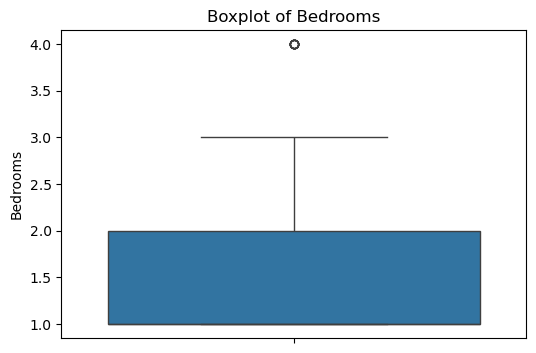

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Bedrooms'])
plt.title("Boxplot of Bedrooms")
plt.show()

In [67]:
df["Bedrooms"].value_counts()

Bedrooms
1    280
2     99
3     56
4      9
Name: count, dtype: int64

In [69]:
df["Bathrooms"].value_counts()

Bathrooms
1    335
2    109
Name: count, dtype: int64

In [71]:
df = df[df['Rental_Price'] < df['Rental_Price'].quantile(0.99)]
df = df[df['Size_in_Sqft'] < df['Size_in_Sqft'].quantile(0.99)]

### Univariate Analysis - Categorical Columns


Value counts for Neighborhood:
Neighborhood
Uptown      121
Midtown     117
Suburbs     102
Downtown     94
Name: count, dtype: int64


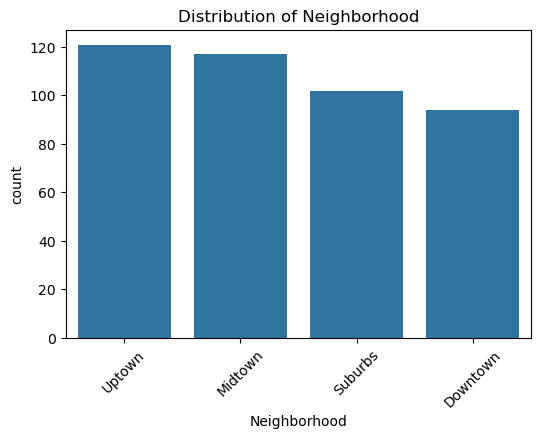


Value counts for Furnished:
Furnished
Furnished      291
Unfurnished    143
Name: count, dtype: int64


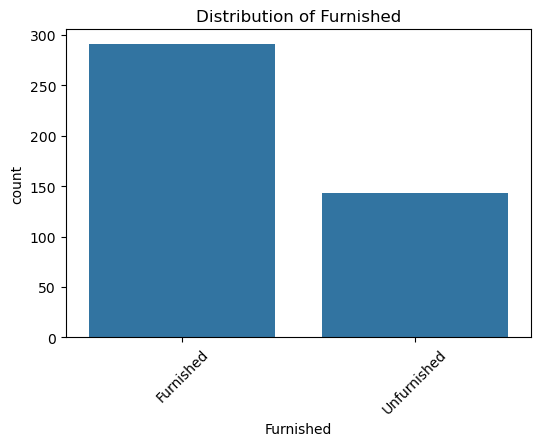


Value counts for Building_Type:
Building_Type
Condo        152
Studio       142
Apartment    140
Name: count, dtype: int64


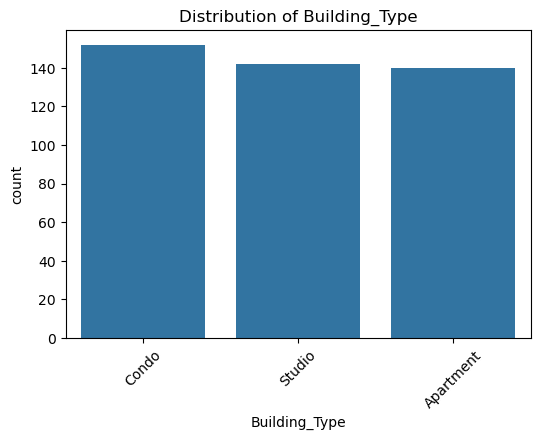

In [78]:
cat_cols = ['Neighborhood', 'Furnished', 'Building_Type']

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


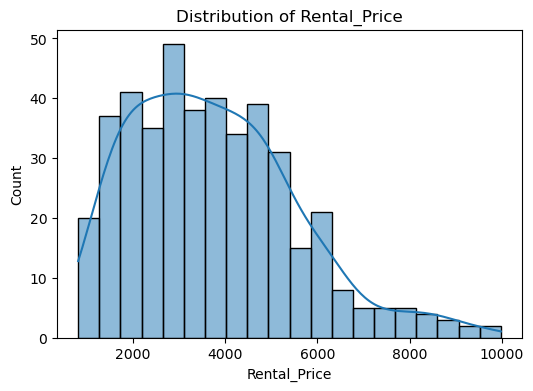

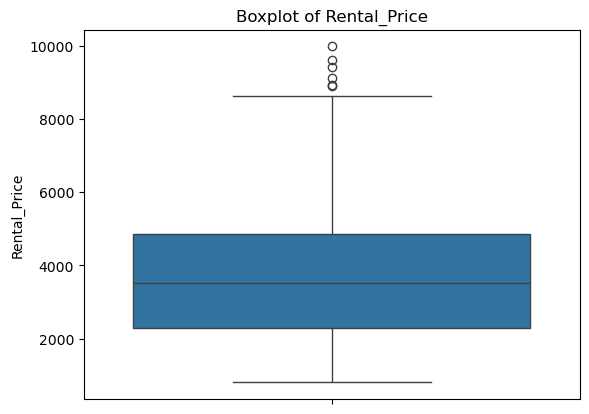

In [80]:
plt.figure(figsize=(6,4))
sns.histplot(df['Rental_Price'], bins=20, kde=True)
plt.title("Distribution of Rental_Price")
plt.show()

sns.boxplot(y=df['Rental_Price'])
plt.title("Boxplot of Rental_Price")
plt.show()

Observation:  Rental Price is positively skewed

### Bi Variate Analysis

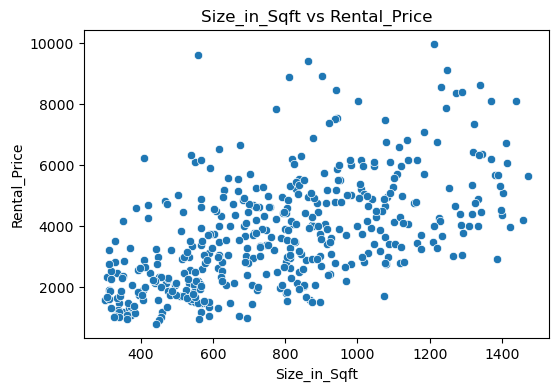

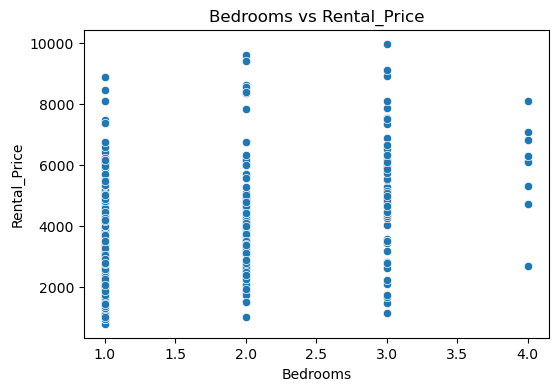

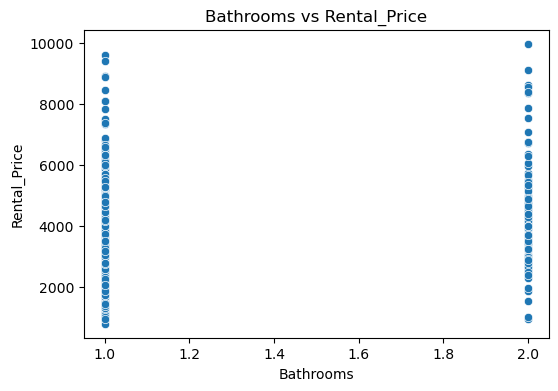

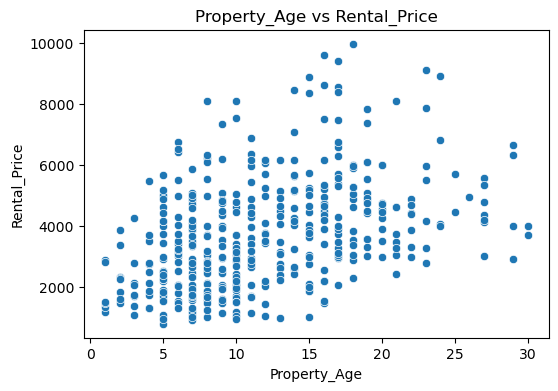

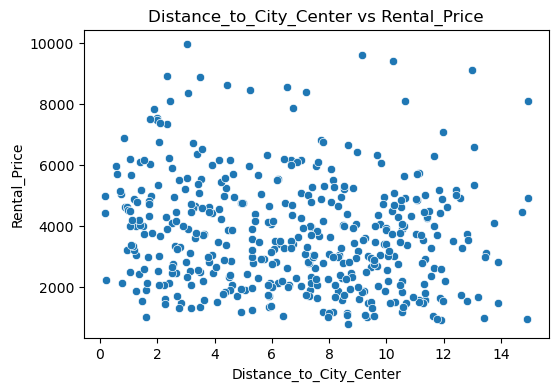

In [83]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['Rental_Price'])
    plt.title(f"{col} vs Rental_Price")
    plt.show()


Observation - There is a linear relationship between size and rental price

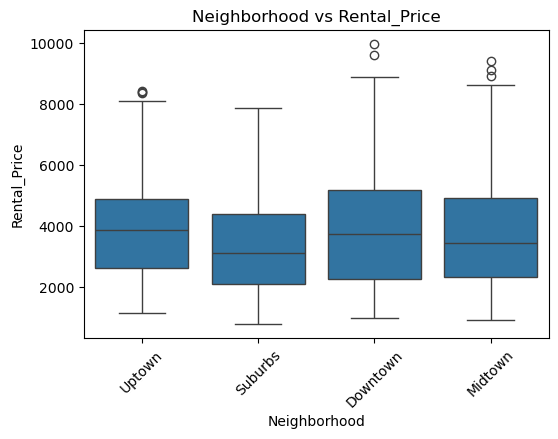

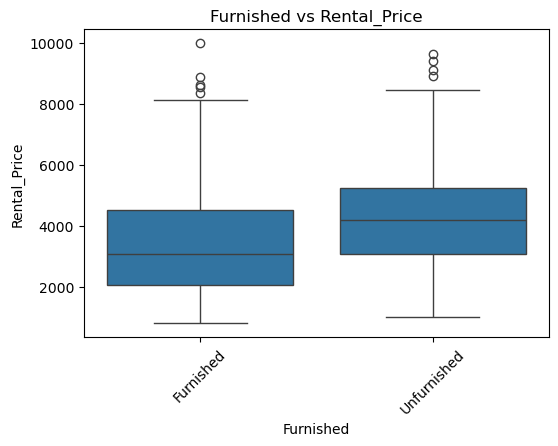

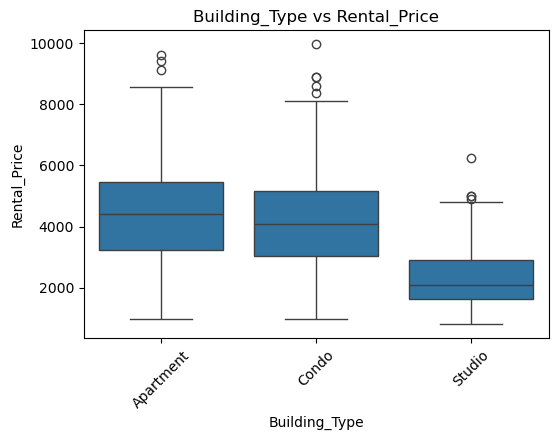

In [86]:
cat_cols = ['Neighborhood', 'Furnished', 'Building_Type']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=df['Rental_Price'])
    plt.title(f"{col} vs Rental_Price")
    plt.xticks(rotation=45)
    plt.show()


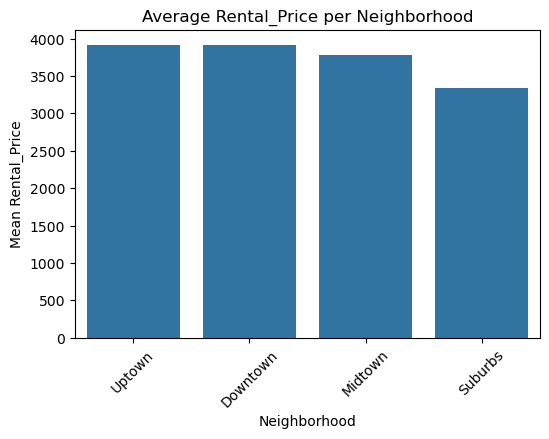

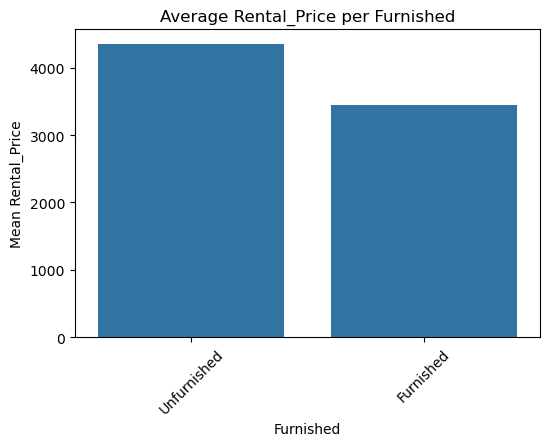

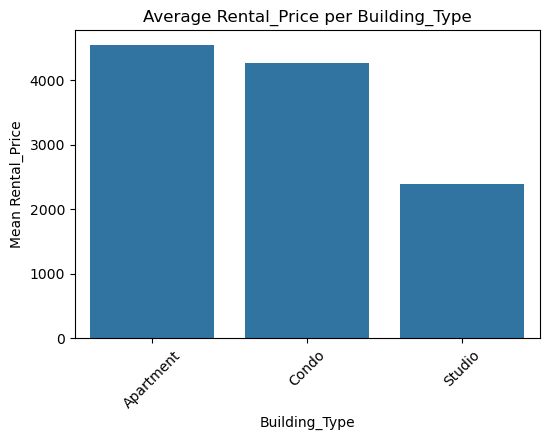

In [87]:
for col in cat_cols:
    mean_prices = df.groupby(col)['Rental_Price'].mean().sort_values(ascending=False)
    plt.figure(figsize=(6,4))
    sns.barplot(x=mean_prices.index, y=mean_prices.values)
    plt.title(f"Average Rental_Price per {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Mean Rental_Price")
    plt.show()

Observation - Apartment Houses tend to have higer rental price

### Multi Variate Analysis

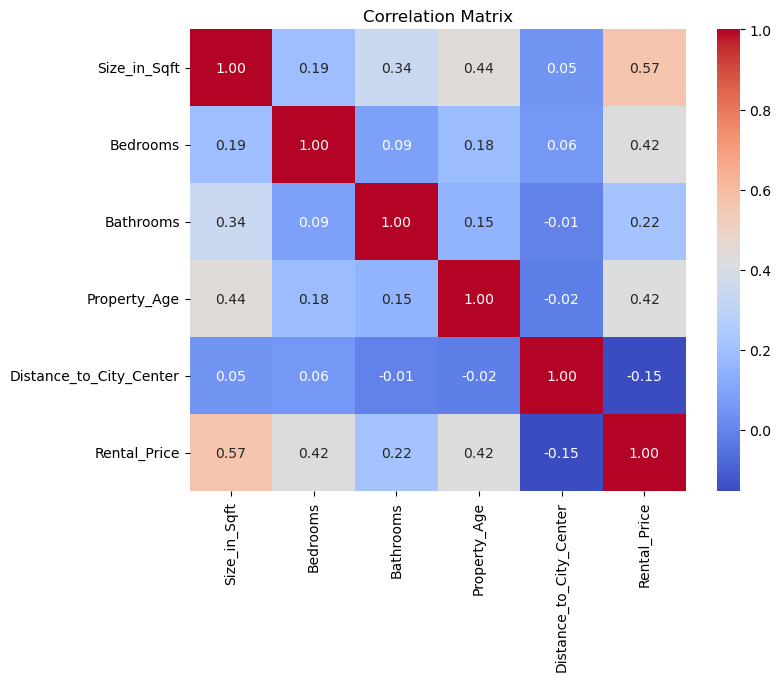

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Size_in_Sqft', 'Bedrooms', 'Bathrooms', 'Property_Age', 'Distance_to_City_Center', 'Rental_Price']

corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Predictive Modelling

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [96]:
num_cols = ['Size_in_Sqft', 'Bedrooms', 'Bathrooms', 'Property_Age', 'Distance_to_City_Center']
cat_cols = ['Neighborhood', 'Furnished', 'Building_Type']

In [97]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

In [99]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [100]:
X = df.drop('Rental_Price', axis=1)
y = df['Rental_Price']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TheilSen:
  RMSE: 539.89
  MAE : 406.44
  R²  : 0.8544

PassiveAggressive:
  RMSE: 541.97
  MAE : 403.29
  R²  : 0.8533

Huber:
  RMSE: 589.49
  MAE : 461.72
  R²  : 0.8265

RANSAC:
  RMSE: 633.14
  MAE : 500.66
  R²  : 0.7998

ExtraTrees:
  RMSE: 850.86
  MAE : 642.92
  R²  : 0.6385

Bagging:
  RMSE: 833.50
  MAE : 657.22
  R²  : 0.6531


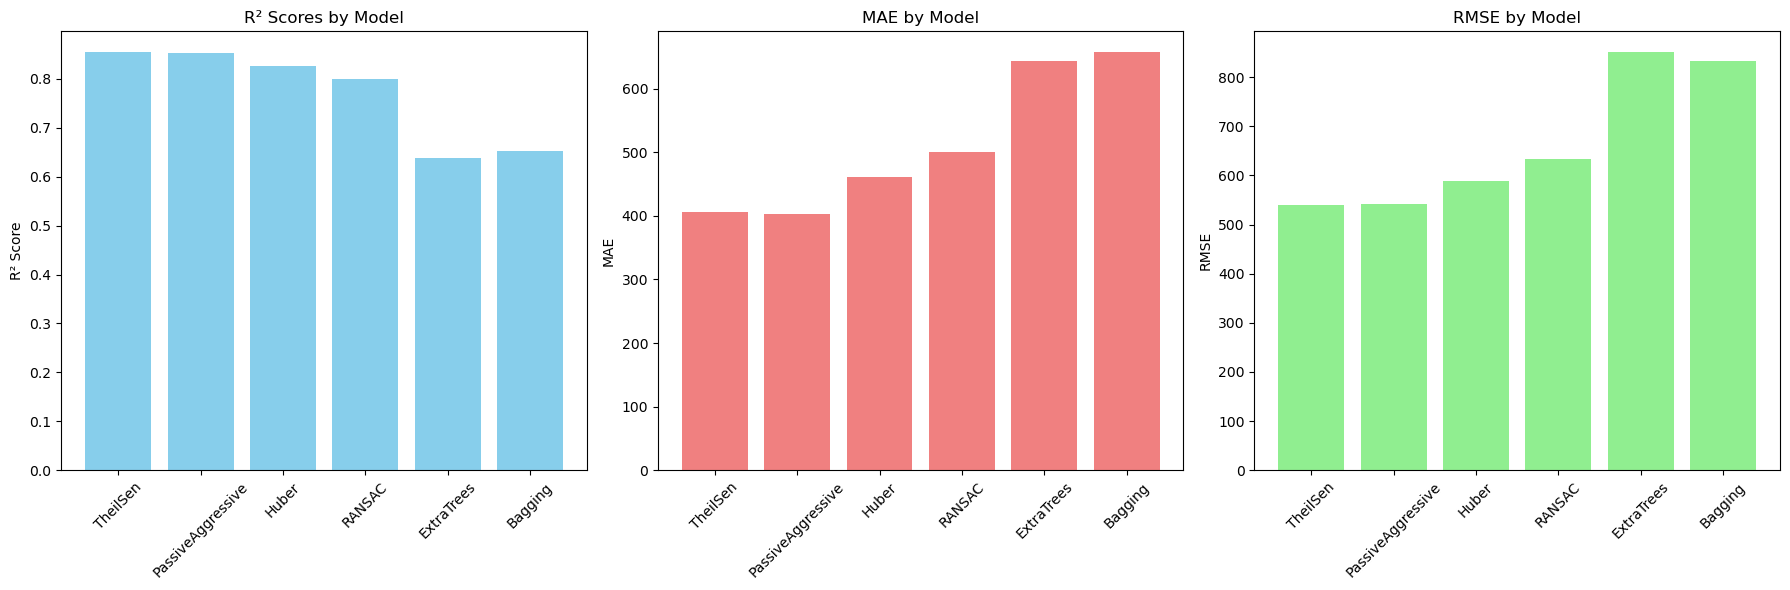

In [113]:
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt

models = {
    "TheilSen": TheilSenRegressor(max_subpopulation=1000, n_subsamples=None, max_iter=300, random_state=42, n_jobs=-1),
    "PassiveAggressive": PassiveAggressiveRegressor(C=1.0, epsilon=0.1, max_iter=1000, random_state=42, tol=1e-3),
    "Huber": HuberRegressor(epsilon=1.35, alpha=0.0001, max_iter=1000),
    "RANSAC": RANSACRegressor(min_samples=0.5, residual_threshold=None, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=200, max_features='sqrt', bootstrap=True, random_state=42, n_jobs=-1),
    "Bagging": BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=15, random_state=42),
        n_estimators=50, max_samples=0.8, max_features=0.8, random_state=42, n_jobs=-1
    )
}

results = {}
model_names = []
r2_scores = []
mae_scores = []
rmse_scores = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)

    results[name] = {'rmse': rmse, 'mae': mae, 'r2': r2}
    model_names.append(name)
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    
    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE : {mae:.2f}")
    print(f"  R²  : {r2:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(model_names, r2_scores, color='skyblue')
axes[0].set_title('R² Scores by Model')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(model_names, mae_scores, color='lightcoral')
axes[1].set_title('MAE by Model')
axes[1].set_ylabel('MAE')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(model_names, rmse_scores, color='lightgreen')
axes[2].set_title('RMSE by Model')
axes[2].set_ylabel('RMSE')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Hyper parameter Tuning

In [116]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

theilsen_param_grid2 = {
    'model__max_subpopulation': [1000, 2000, 5000],
    'model__n_subsamples': [None, 100, 200],
    'model__max_iter': [300, 500, 1000]
}

theilsen_pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('model', TheilSenRegressor(random_state=42, n_jobs=-1))
])

theilsen_random = RandomizedSearchCV(
    theilsen_pipeline2,
    theilsen_param_grid2,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Randomized search for TheilSen...")
theilsen_random.fit(X_train, y_train)

print(f"Best TheilSen parameters: {theilsen_random.best_params_}")
print(f"Best TheilSen R²: {theilsen_random.best_score_:.4f}")

best_theilsen2 = theilsen_random.best_estimator_
y_pred_theilsen2 = best_theilsen2.predict(X_test)
r2_theilsen2 = r2_score(y_test, y_pred_theilsen2)

print(f"\nTheilSen (Randomized Search):")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_theilsen2)):.2f}")
print(f"  MAE : {mean_absolute_error(y_test, y_pred_theilsen2):.2f}")
print(f"  R²  : {r2_theilsen2:.4f}")

print(f"\n" + "="*60)
print("ORIGINAL BEST MODELS (No tuning needed)")
print("="*60)

original_theilsen = Pipeline([
    ('preprocessor', preprocessor),
    ('model', TheilSenRegressor(max_subpopulation=1000, n_subsamples=None, max_iter=300, random_state=42, n_jobs=-1))
])

original_pa = Pipeline([
    ('preprocessor', preprocessor),
    ('model', PassiveAggressiveRegressor(C=1.0, epsilon=0.1, max_iter=1000, random_state=42))
])

original_theilsen.fit(X_train, y_train)
original_pa.fit(X_train, y_train)

y_pred_orig_theilsen = original_theilsen.predict(X_test)
y_pred_orig_pa = original_pa.predict(X_test)

print(f"\nTheilSen (Original - Best):")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_orig_theilsen)):.2f}")
print(f"  MAE : {mean_absolute_error(y_test, y_pred_orig_theilsen):.2f}")
print(f"  R²  : {r2_score(y_test, y_pred_orig_theilsen):.4f}")

print(f"\nPassiveAggressive (Original):")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_orig_pa)):.2f}")
print(f"  MAE : {mean_absolute_error(y_test, y_pred_orig_pa):.2f}")
print(f"  R²  : {r2_score(y_test, y_pred_orig_pa):.4f}")

Randomized search for TheilSen...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best TheilSen parameters: {'model__n_subsamples': 100, 'model__max_subpopulation': 1000, 'model__max_iter': 300}
Best TheilSen R²: 0.4677

TheilSen (Randomized Search):
  RMSE: 643.82
  MAE : 500.40
  R²  : 0.7930

ORIGINAL BEST MODELS (No tuning needed)

TheilSen (Original - Best):
  RMSE: 539.89
  MAE : 406.44
  R²  : 0.8544

PassiveAggressive (Original):
  RMSE: 541.97
  MAE : 403.29
  R²  : 0.8533


In [117]:
from sklearn.ensemble import VotingRegressor

ensemble = Pipeline([
    ('preprocessor', preprocessor),
    ('model', VotingRegressor([
        ('theilsen', TheilSenRegressor(max_subpopulation=1000, n_subsamples=None, max_iter=300, random_state=42, n_jobs=-1)),
        ('passive_aggressive', PassiveAggressiveRegressor(C=1.0, epsilon=0.1, max_iter=1000, random_state=42))
    ]))
])

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

print(f"\nEnsemble (TheilSen + PassiveAggressive):")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ensemble)):.2f}")
print(f"  MAE : {mean_absolute_error(y_test, y_pred_ensemble):.2f}")
print(f"  R²  : {r2_score(y_test, y_pred_ensemble):.4f}")


Ensemble (TheilSen + PassiveAggressive):
  RMSE: 531.12
  MAE : 398.39
  R²  : 0.8591


FINAL BEST MODEL: Ensemble (TheilSen + PassiveAggressive)
RMSE: 531.12
MAE: 398.39
R²: 0.8591

IMPROVEMENT OVER SINGLE BEST MODEL:
R² improvement: 0.0047
RMSE improvement: 8.77
MAE improvement: 8.05


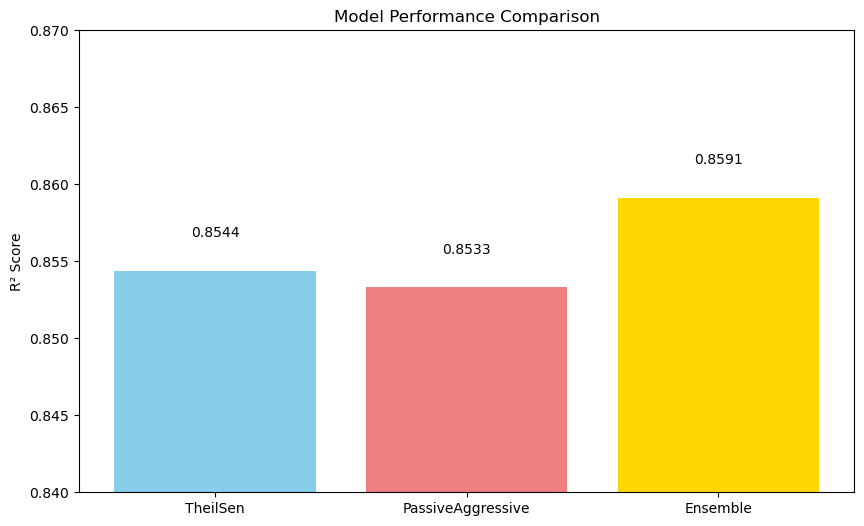

In [118]:
from sklearn.ensemble import VotingRegressor
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', VotingRegressor([
        ('theilsen', TheilSenRegressor(max_subpopulation=1000, n_subsamples=None, max_iter=300, random_state=42, n_jobs=-1)),
        ('passive_aggressive', PassiveAggressiveRegressor(C=1.0, epsilon=0.1, max_iter=1000, random_state=42))
    ]))
])

final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)

final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_mae = mean_absolute_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

print("="*60)
print("FINAL BEST MODEL: Ensemble (TheilSen + PassiveAggressive)")
print("="*60)
print(f"RMSE: {final_rmse:.2f}")
print(f"MAE: {final_mae:.2f}")
print(f"R²: {final_r2:.4f}")

print(f"\nIMPROVEMENT OVER SINGLE BEST MODEL:")
print(f"R² improvement: {final_r2 - 0.8544:.4f}")
print(f"RMSE improvement: {539.89 - final_rmse:.2f}")
print(f"MAE improvement: {406.44 - final_mae:.2f}")

import joblib
joblib.dump(final_model, 'best_rental_price_model.pkl')

models_comparison = {
    'TheilSen': 0.8544,
    'PassiveAggressive': 0.8533, 
    'Ensemble': final_r2
}

plt.figure(figsize=(10, 6))
plt.bar(models_comparison.keys(), models_comparison.values(), color=['skyblue', 'lightcoral', 'gold'])
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.ylim(0.84, 0.87)
for i, v in enumerate(models_comparison.values()):
    plt.text(i, v + 0.002, f'{v:.4f}', ha='center', va='bottom')
plt.show()

## Model Explainability

In [140]:
import shap
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

final_model = joblib.load('best_rental_price_model.pkl')
preprocessor = final_model.named_steps['preprocessor']
model = final_model.named_steps['model']

feature_names = preprocessor.get_feature_names_out()

X_train_trans = preprocessor.transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_df = pd.DataFrame(X_train_trans, columns=feature_names)
X_test_df = pd.DataFrame(X_test_trans, columns=feature_names)

shap_sample = X_test_df.sample(n=min(100, len(X_test_df)), random_state=42)

explainer = shap.Explainer(model.predict, X_train_df)
shap_values = explainer(shap_sample)

print("SHAP ready!")

SHAP ready!


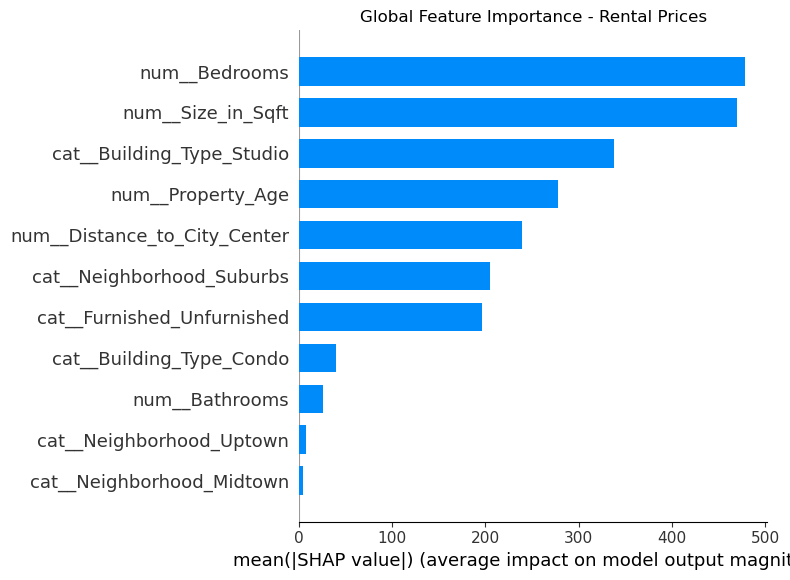

In [142]:
plt.figure(figsize=(12, 7))
shap.summary_plot(shap_values, shap_sample, plot_type="bar", show=False)
plt.title("Global Feature Importance - Rental Prices")
plt.tight_layout()
plt.show()

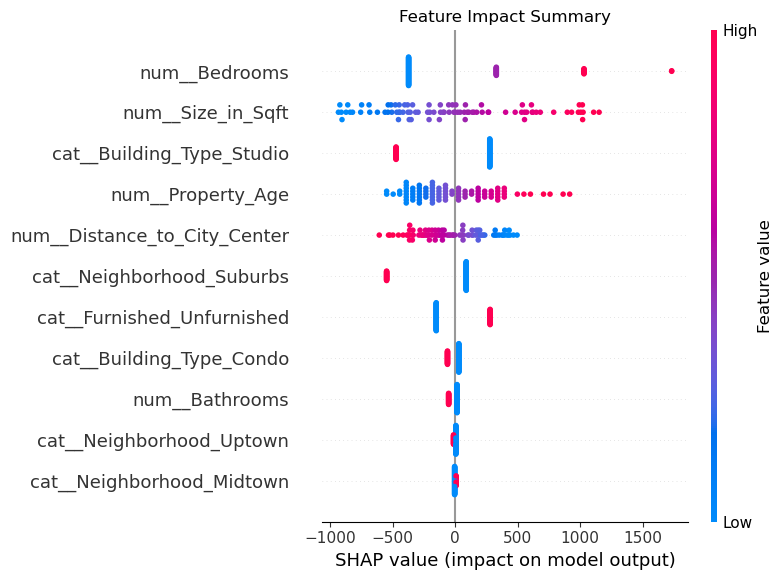

In [144]:
plt.figure(figsize=(12, 7))
shap.summary_plot(shap_values, shap_sample, show=False)
plt.title("Feature Impact Summary")
plt.tight_layout()
plt.show()

In [148]:
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'MeanAbs': np.abs(shap_values.values).mean(0),
    'MeanSHAP': shap_values.values.mean(0)
})

feature_importance['Percent'] = (
    feature_importance['MeanAbs'] / feature_importance['MeanAbs'].sum() * 100
)

feature_importance = feature_importance.sort_values('MeanAbs', ascending=False)

In [150]:
feature_mapping = {
    'num__Size_in_Sqft': 'Property Size',
    'num__Bedrooms': 'Bedrooms',
    'num__Bathrooms': 'Bathrooms',
    'num__Distance_to_City_Center': 'Distance to City',
    'cat__Neighborhood_Downtown': 'Downtown Area',
    'cat__Neighborhood_Suburbs': 'Suburbs',
    'cat__Furnished_Furnished': 'Furnished',
    'cat__Building_Type_Apartment': 'Apartment'
}

top_feature = feature_mapping.get(
    feature_importance.iloc[0]['Feature'],
    feature_importance.iloc[0]['Feature']
)

second_feature = feature_mapping.get(
    feature_importance.iloc[1]['Feature'],
    feature_importance.iloc[1]['Feature']
)

most_negative = (
    feature_importance[feature_importance['MeanSHAP'] < 0]
    .iloc[0]['Feature']
)
most_negative = feature_mapping.get(most_negative, most_negative)

print("\n========================================")
print("BUSINESS INSIGHTS")
print("========================================")

print("\nFor Property Owners:")
print(f" • Improve {top_feature} — biggest driver of rental value")

print("\nFor Tenants:")
print(f" • Properties with better {most_negative} offer better affordability")

print("\nFor Real Estate Agents:")
print(f" • Highlight {top_feature} and {second_feature} in listings")



BUSINESS INSIGHTS

For Property Owners:
 • Improve Bedrooms — biggest driver of rental value

For Tenants:
 • Properties with better Bedrooms offer better affordability

For Real Estate Agents:
 • Highlight Bedrooms and Property Size in listings


In [154]:
joblib.dump({
    'feature_importance': feature_importance,
    'top_driver': top_feature,
    'second_driver': second_feature,
    'top_negative': most_negative,
}, 'shap_insights_compact.pkl')

print("\nCompact SHAP insights saved!")


Compact SHAP insights saved!
